### **Taller 3**

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses empleando los métodos vistos en la clase. Compare
los resultados con el mejor modelo encontrado en el ejercicio anterior. 

Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.

In [96]:
# Verificación: pmdarima funciona en Python 3.11
import pmdarima
print("✅ pmdarima funciona! Versión:", pmdarima.__version__)

# Importaciones originales
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA
import pandas as pd
import numpy as np 
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos 
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

print("✅ Todas las librerías cargadas correctamente!")

✅ pmdarima funciona! Versión: 2.0.4
✅ Todas las librerías cargadas correctamente!


In [97]:
# Configuración de gráficos
import matplotlib.pyplot as plt

# Configuración básica de matplotlib (funciona siempre)
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'lines.linewidth': 2,
    'grid.alpha': 0.3,
    'axes.prop_cycle': plt.cycler(color=['#007acc', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
})

# Intentar configurar seaborn (opcional)
try:
    import seaborn as sns
    sns.set_style("whitegrid")
    sns.set_context("talk", font_scale=1.2)
    print("✅ Seaborn configurado")
except ImportError:
    print("⚠️ Seaborn no disponible - usando solo matplotlib")
except Exception as e:
    print(f"⚠️ Error configurando seaborn: {e}")
    print("📊 Continuando con matplotlib")

print("✅ Configuración de gráficos lista")

✅ Seaborn configurado
✅ Configuración de gráficos lista


In [98]:
data = pd.read_excel("https://raw.githubusercontent.com/profedaniel86/Series_de_Tiempo/refs/heads/main/1.Intro/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


In [99]:
acf(data['Ocupados'],100)

array([ 1.        ,  0.97855484,  0.96290943,  0.94999592,  0.93767278,
        0.92828634,  0.91803512,  0.90827078,  0.89628125,  0.88592368,
        0.8772359 ,  0.8728291 ,  0.86780346,  0.84936325,  0.83206921,
        0.81773834,  0.80588679,  0.79695724,  0.78708534,  0.77639894,
        0.76345987,  0.75177965,  0.74296472,  0.73663393,  0.73128083,
        0.71333785,  0.69520217,  0.68008434,  0.66685076,  0.65659735,
        0.64390143,  0.63170587,  0.6184013 ,  0.60541159,  0.59596135,
        0.58936238,  0.5824738 ,  0.56326155,  0.54546119,  0.53051481,
        0.51728811,  0.50428486,  0.49101089,  0.47925461,  0.46319306,
        0.44845726,  0.43749364,  0.42832594,  0.41888732,  0.39978705,
        0.38042649,  0.36488965,  0.3511987 ,  0.33885208,  0.32444098,
        0.31127156,  0.29578232,  0.2816048 ,  0.27027944,  0.26089372,
        0.25198632,  0.23225082,  0.21626236,  0.20213435,  0.19034266,
        0.17876481,  0.16723237,  0.15527154,  0.13923528,  0.12

hay una alta correlación en los datos

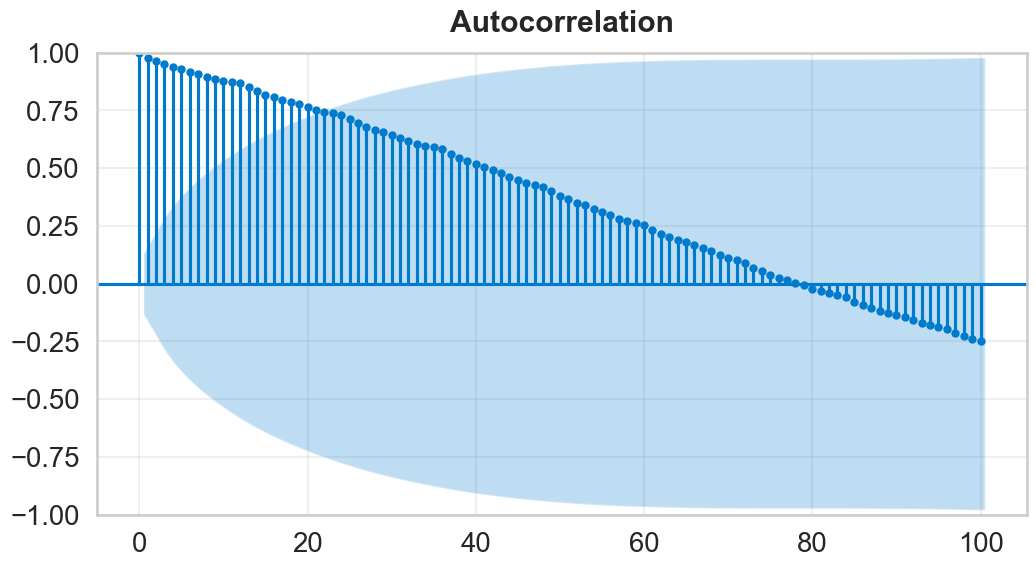

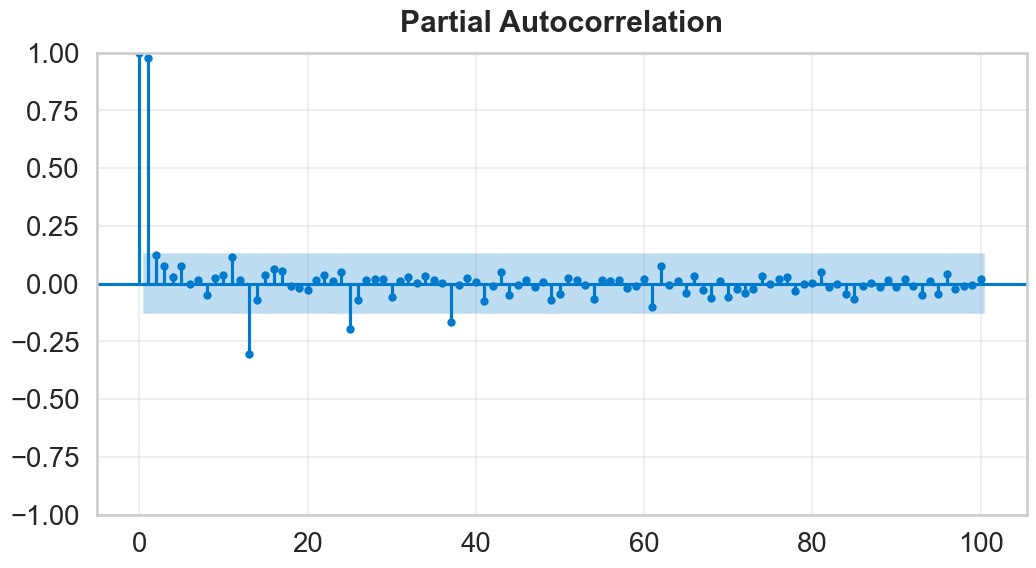

In [100]:
plot_acf(data['Ocupados'],lags=100);
plot_pacf(data['Ocupados'],lags=100);

In [101]:
## information_criterion (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’)
model = auto_arima(data["Ocupados"],max_p=10, max_q=10,information_criterion = ("aic"), trace=True)
model.summary()

c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-pack

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2950.596, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2940.100, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2930.671, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2950.516, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2950.596, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2940.100, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2930.671, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2950.516, Time=0.02 sec


c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-pack

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2911.190, Time=0.18 sec


c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2912.742, Time=0.23 sec


c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2912.817, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2913.991, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2933.827, Time=0.04 sec


c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2927.014, Time=0.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.898 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1451.595
Date:               sáb, 08 nov. 2025   AIC                           2911.190
Time:                        15:17:57   BIC                           2924.782
Sample:                    01-01-2001   HQIC                          2916.678
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8551      2.485      3.965      0.000       4.984      14.726
ar.L1          0.4419      0.101      4.357      0.000       0.243       0.641
ma.L1         -0.8618      0.053    -16.414      0.000      -0.965      -0.759
sigma2      2.948e+04   2480.399     11.885      0.000    2.46e+04    3.43e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                57.86
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.99
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
#Le estoy quitando a los residuos del model el primer dato, 
# ya que como se compara con nada, genera un dato outier que afecta los 
# supuestos del modelo
residuos = model.resid()[1:]
residuos

mes
2001-02-01    159.981701
2001-03-01    -38.696295
2001-04-01     28.345016
2001-05-01     22.031179
2001-06-01     18.259687
                 ...    
2019-02-01    -33.944117
2019-03-01     56.155415
2019-04-01   -179.849546
2019-05-01     73.008212
2019-06-01      8.094891
Length: 221, dtype: float64

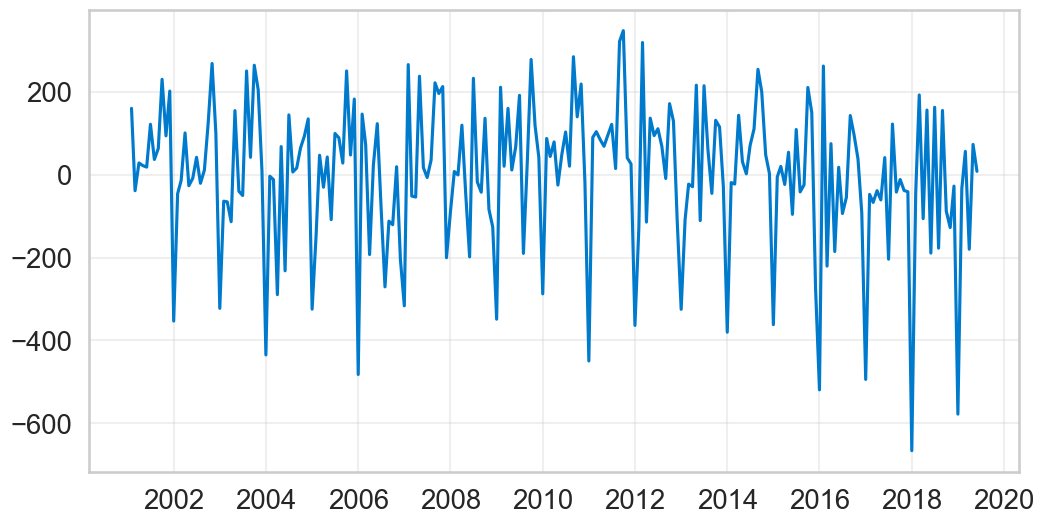

In [103]:
fig = plt.figure(figsize=(12, 6))
plt.plot(residuos,label="Residuales")

## Validación de supuestos del modelo ARIMA

Voy a revisar si los residuales del modelo cumplen con los supuestos básicos:

=== AUTOCORRELACIÓN ===
Test Ljung-Box: p-valor = 0.000000
✗ HAY autocorrelación


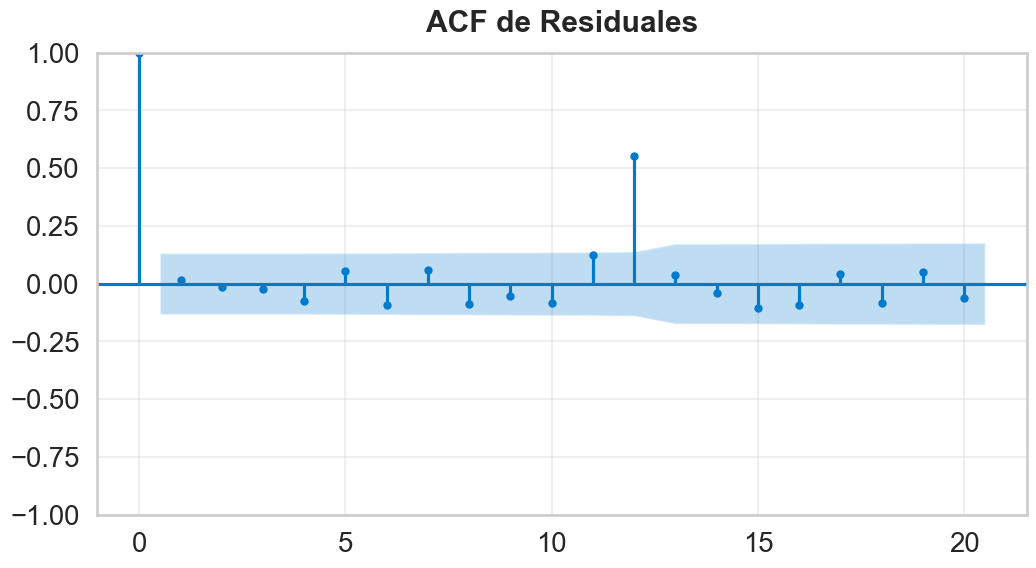

In [124]:
# 1. SUPUESTO: NO AUTOCORRELACIÓN
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import pandas as pd

print("=== AUTOCORRELACIÓN ===")
ljung_autocorr = acorr_ljungbox(residuos, lags=24)['lb_pvalue'].iloc[-1]
print(f"Test Ljung-Box: p-valor = {ljung_autocorr:.6f}")

if ljung_autocorr > 0.05:
    print("✓ No hay autocorrelación")
else:
    print("✗ HAY autocorrelación")
    
# Gráfico ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuos, lags=20, title="ACF de Residuales")
plt.show()

=== NORMALIDAD ===
Test Shapiro-Wilk: p-valor = 0.000000
Test Jarque-Bera: p-valor = 0.000000
✗ Los residuales NO son normales


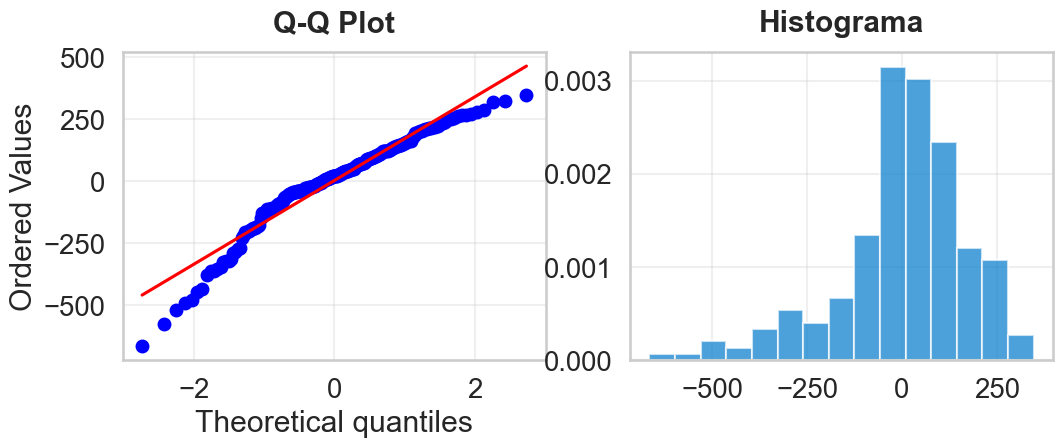

In [125]:
# 2. SUPUESTO: NORMALIDAD
print("=== NORMALIDAD ===")

# Shapiro-Wilk
shapiro_pvalue = stats.shapiro(residuos)[1]
print(f"Test Shapiro-Wilk: p-valor = {shapiro_pvalue:.6f}")

# Jarque-Bera
jb_pvalue = stats.jarque_bera(residuos)[1]
print(f"Test Jarque-Bera: p-valor = {jb_pvalue:.6f}")

if shapiro_pvalue > 0.05 and jb_pvalue > 0.05:
    print("✓ Los residuales son normales")
else:
    print("✗ Los residuales NO son normales")

# Gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
stats.probplot(residuos, dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot")
ax2.hist(residuos, bins=15, density=True, alpha=0.7)
ax2.set_title("Histograma")
plt.show()

=== HOMOSCEDASTICIDAD ===
Test Ljung-Box (res²): p-valor = 0.565826
Test Breusch-Pagan: p-valor = 0.189033
✓ Varianza constante (homoscedasticidad)


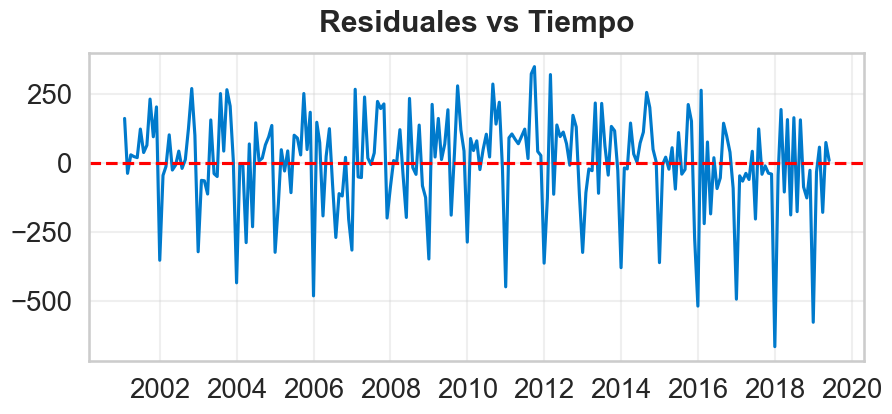

In [127]:
# 3. SUPUESTO: HOMOSCEDASTICIDAD
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

print("=== HOMOSCEDASTICIDAD ===")

# Ljung-Box en residuos²
ljung_hetero = acorr_ljungbox(residuos**2, lags=10)['lb_pvalue'].iloc[-1]
print(f"Test Ljung-Box (res²): p-valor = {ljung_hetero:.6f}")

# Breusch-Pagan
tiempo = np.arange(len(residuos)).reshape(-1, 1)
tiempo_const = sm.add_constant(tiempo)
bp_pvalue = het_breuschpagan(residuos, tiempo_const)[1]
print(f"Test Breusch-Pagan: p-valor = {bp_pvalue:.6f}")

if ljung_hetero > 0.05 and bp_pvalue > 0.05:
    print("✓ Varianza constante (homoscedasticidad)")
else:
    print("✗ Varianza NO constante (heteroscedasticidad)")

# Gráfico
plt.figure(figsize=(10, 4))
plt.plot(residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuales vs Tiempo")
plt.show()

In [128]:
# RESUMEN: Tabla de resultados
resultados = pd.DataFrame({
    'Supuesto': ['No Autocorrelación', 'Normalidad', 'Normalidad', 'Homoscedasticidad', 'Homoscedasticidad'],
    'Prueba': ['Ljung-Box', 'Shapiro-Wilk', 'Jarque-Bera', 'Ljung-Box (res²)', 'Breusch-Pagan'],
    'P-valor': [ljung_autocorr, shapiro_pvalue, jb_pvalue, ljung_hetero, bp_pvalue],
    'Cumple': ['✓' if ljung_autocorr > 0.05 else '✗',
               '✓' if shapiro_pvalue > 0.05 else '✗',
               '✓' if jb_pvalue > 0.05 else '✗',
               '✓' if ljung_hetero > 0.05 else '✗',
               '✓' if bp_pvalue > 0.05 else '✗']
})

print("TABLA RESUMEN DE SUPUESTOS:")
print(resultados.to_string(index=False))

TABLA RESUMEN DE SUPUESTOS:
          Supuesto           Prueba      P-valor Cumple
No Autocorrelación        Ljung-Box 1.272445e-20      ✗
        Normalidad     Shapiro-Wilk 1.250534e-07      ✗
        Normalidad      Jarque-Bera 3.053778e-13      ✗
 Homoscedasticidad Ljung-Box (res²) 5.658258e-01      ✓
 Homoscedasticidad    Breusch-Pagan 1.890332e-01      ✓


## Conclusiones

El modelo ARIMA presenta fallas en algunos supuestos clave, específicamente en autocorrelación y normalidad. Esto limita la confiabilidad de los pronósticos.

Antes de continuar dividimos el data set en entrenamiento y prueba con una prueba de 6 meses, ya que es la que es lo que se requiere para la predicción

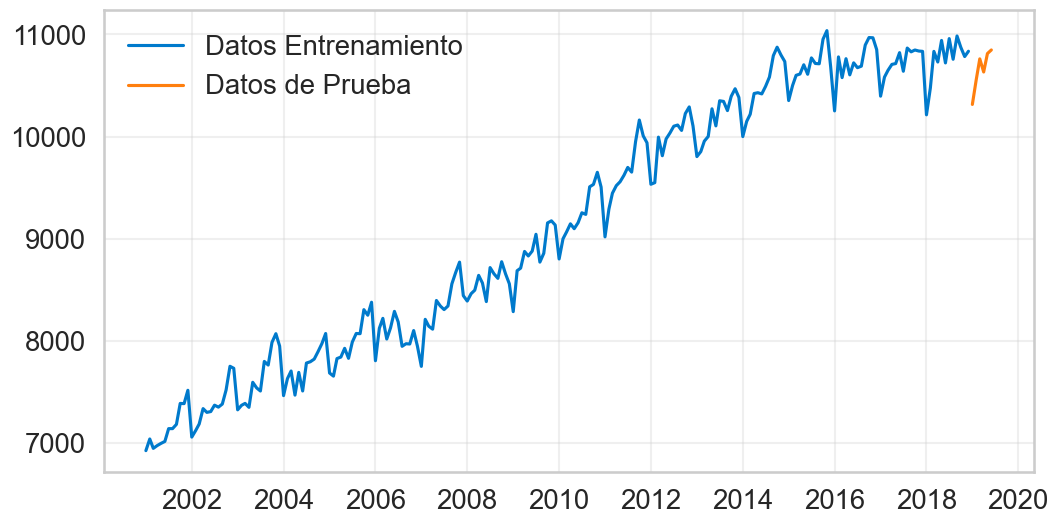

In [109]:
train_len = 216
train_to = data[["Ocupados"]][:train_len]
test_to = data[["Ocupados"]][train_len:]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_to,label="Datos Entrenamiento")
plt.plot(test_to,label="Datos de Prueba")
plt.legend(loc= "upper left")
plt.show()

Agrego la numeración a la data de entrenamiento para poder correr el modelo

In [118]:
# Crear columna con numeración consecutiva
train_to['time'] = range(1, len(train_to) + 1)

c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


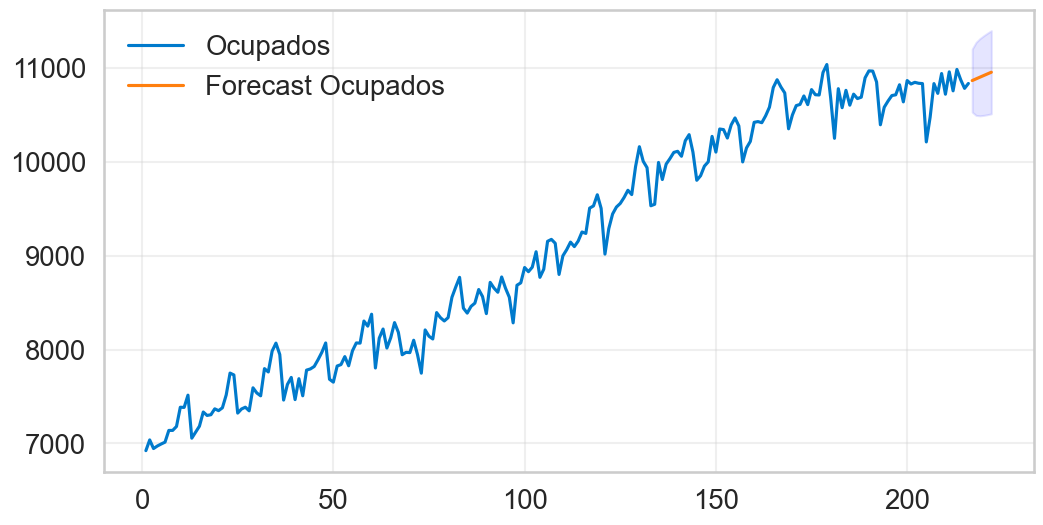

In [120]:
h=6

y_forec, conf_int  = model.predict(h,return_conf_int=True,alpha=0.05)
preds = pd.DataFrame(np.column_stack([y_forec,conf_int[:,0] , conf_int[:,1]]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

x_for= np.linspace((train_to.shape[0]+1),(train_to.shape[0]+h),h)

fig = plt.figure(figsize=(12, 6))
plt.plot(train_to["time"],train_to["Ocupados"],label="Ocupados")
plt.plot(x_for,preds['Point_forecast'],label="Forecast Ocupados")
plt.fill_between(x_for,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend(loc= "upper left")
plt.show()